## Handle Imbalanced Dataset

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [2]:
df = pd.read_csv(r'C:\Users\91973\Desktop\Data_Science\My_Github\Important_Topics\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
columns = df.columns.tolist()

In [5]:
columns = [i for i in columns if i not in ['Class']]

In [6]:
X = df[columns]
Y = df['Class']

In [7]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


Text(0, 0.5, 'Frequency')

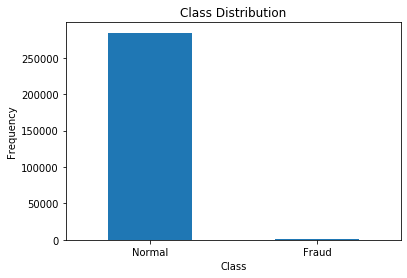

In [8]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
## Get the Fraud and the normal dataset 
frd = df[df['Class']==1]
normal = df[df['Class']==0]

In [10]:
print(frd.shape,normal.shape)

(492, 31) (284315, 31)


## SMOTE (Synthetic Minority Over-sampling Technique)

In [11]:
X = df.drop('Class', axis=1)
y = df[['Class']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227845, 30)
(227845, 1)
(56962, 30)
(56962, 1)


In [15]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [16]:
print(X_train.shape)
print(y_train.shape)

(227845, 30)
(227845, 1)
